This is mark down.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "name": ["Bob", "Alice", "Charlie", "Allen"],
    "grade_level": [10, 10, 11, 10],
    "english_score": [90, 85, 81, 81],
    "math_score": [100, 95, 95, 70]
    
}

df = pd.DataFrame(data)
df.set_index("name", inplace=True)

In [ ]:
print(df.info())

In [ ]:
df.describe()

In [ ]:
#filter row
df[df["english_score"]==90]

In [ ]:
df.query("grade_level==10 &  name.str.contains('A', na=False)")

In [37]:
def cal_grade(row):
    value=(
        row["math_score"]+row["english_score"])/2
    if value>=95:
        return "A+"
    if value >=85:
        return "A"
    if value>=65:
        return "B"
    return "F"
df["score_grade"]=df.apply(cal_grade, axis=1)
df

,grade_level,english_score,math_score,score_grade
name,,,,
Bob,10,90,100,A+
Alice,10,85,95,A
Charlie,11,81,95,A
Allen,10,81,70,B


In [38]:
print(df["score_grade"].replace({"A":"High","A+":"High","B":"Medium","F":"low"}))

name
Bob          High
Alice        High
Charlie      High
Allen      Medium
Name: score_grade, dtype: object


In [ ]:
df["english_score"].plot.hist()
plt.title("English score distribution")
plt.xlabel("English score")
plt.ylabel("Frequency")

In [ ]:
fig, axis=plt.subplots(1,2,figsize=(10,4))
df["math_score"].plot.hist(ax=axis[0])
df["english_score"].plot.hist(ax=axis[1])

In [ ]:
print(df.groupby(by="grade_level")["math_score"].agg(["max","min"]))

In [ ]:
print(df.sort_index(axis=1))

In [ ]:
print(df.sort_values(by="grade_level"))

In [ ]:
print(df.sort_values(by=["math_score","english_score"],\
                     ascending=[True, True],na_position="first"))

In [ ]:
print(df[df["grade_level"]=="10"])

In [ ]:
print(df.filter(items=["Bob","Alice"], axis=0))

In [ ]:
print(df.filter(items=["grade_level","math_score"], axis=1))

In [ ]:
print(df[df["math_score"]==95])

In [ ]:
df[df["math_score"]==95].to_csv("high_math_score.csv")

<Axes: xlabel='math_score', ylabel='english_score'>

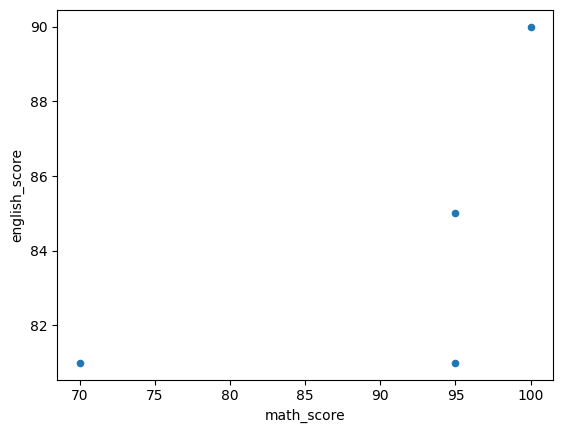

In [39]:
df.plot.scatter(x="math_score", y="english_score")
